# Summary

The dataset for this project was collected from [kaggle](https://www.kaggle.com/datasets/nelgiriyewithana/apple-quality/data) contains information about various attributes of a set of fruits, providing insights into their characteristics. The dataset includes details such as fruit ID, size, weight, sweetness, crunchiness, juiciness, ripeness, acidity, and quality.

The objective is to predict whether an apple will be good or bad by the attributes. This is presented here as a binary classification problem, where each record in the dataset is a quality details of an apple.

In this project, we will employ five different classifier models to find the best candidate algorithm that accurately predicts quality.

### Import Libraries and Data

In [1]:
import pandas as pd
import numpy as np
from scipy import stats

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import  MinMaxScaler, RobustScaler, StandardScaler
from sklearn.model_selection import train_test_split, RandomizedSearchCV

from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.metrics import roc_curve, auc

In [2]:
apple_quality_data = pd.read_excel("./apple_quality.xlsx")
apple_quality_data.head()

,A_id,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness,Acidity,Quality
0,0,-3.970049,-2.512336,5.346330,-1.012009,1.844900,0.329840,-0.491590,good
1,1,-1.195217,-2.839257,3.664059,1.588232,0.853286,0.867530,-0.722809,good
2,2,-0.292024,-1.351282,-1.738429,-0.342616,2.838636,-0.038033,2.621636,bad
3,3,-0.657196,-2.271627,1.324874,-0.097875,3.637970,-3.413761,0.790723,good
4,4,1.364217,-1.296612,-0.384658,-0.553006,3.030874,-1.303849,0.501984,good


## Featureset Exploration

**A_id:** Unique identifier for each fruit

**Size:** Size of the fruit

**Weight:** Weight of the fruit

**Sweetness:** Degree of sweetness of the fruit

**Crunchiness:** Texture indicating the crunchiness of the fruit

**Juiciness:** Level of juiciness of the fruit

**Ripeness:** Stage of ripeness of the fruit

**Acidity:** Acidity level of the fruit

**Quality:** Overall quality of the fruit

In [3]:
apple_quality_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   A_id         4000 non-null   int64  
 1   Size         4000 non-null   float64
 2   Weight       4000 non-null   float64
 3   Sweetness    4000 non-null   float64
 4   Crunchiness  4000 non-null   float64
 5   Juiciness    4000 non-null   float64
 6   Ripeness     4000 non-null   float64
 7   Acidity      4000 non-null   float64
 8   Quality      4000 non-null   object 
dtypes: float64(7), int64(1), object(1)
memory usage: 281.4+ KB


In [4]:
apple_quality_data.describe()

,A_id,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness,Acidity
count,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000
mean,1999.500000,-0.503015,-0.989547,-0.470479,0.985478,0.512118,0.498277,0.076877
std,1154.844867,1.928059,1.602507,1.943441,1.402757,1.930286,1.874427,2.110270
min,0.000000,-7.151703,-7.149848,-6.894485,-6.055058,-5.961897,-5.864599,-7.010538
25%,999.750000,-1.816765,-2.011770,-1.738425,0.062764,-0.801286,-0.771677,-1.377424
50%,1999.500000,-0.513703,-0.984736,-0.504758,0.998249,0.534219,0.503445,0.022609
75%,2999.250000,0.805526,0.030976,0.801922,1.894234,1.835976,1.766212,1.510493
max,3999.000000,6.406367,5.790714,6.374916,7.619852,7.364403,7.237837,7.404736


In [5]:
apple_quality_data.duplicated().sum()

0

In [6]:
apple_quality_data.isna().sum()

A_id           0
Size           0
Weight         0
Sweetness      0
Crunchiness    0
Juiciness      0
Ripeness       0
Acidity        0
Quality        0
dtype: int64

## Data Exploration

The dataset doesn't have any missing values and the quality label Good and Bad are labelized numerically 0 and 1.

In [7]:
data = apple_quality_data.copy()

data = data.drop(columns = ['A_id'])
    
def label(Quality):
        
    if Quality == "good":
        return 0
    
    if Quality == "bad":
        return 1
    
    return None
    
data['Quality_Label'] = data['Quality'].apply(label)
    
data.drop(columns=['Quality'], inplace=True)

data.astype({'Quality_Label' : 'int64'})

data.head()

,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness,Acidity,Quality_Label
0,-3.970049,-2.512336,5.346330,-1.012009,1.844900,0.329840,-0.491590,0
1,-1.195217,-2.839257,3.664059,1.588232,0.853286,0.867530,-0.722809,0
2,-0.292024,-1.351282,-1.738429,-0.342616,2.838636,-0.038033,2.621636,1
3,-0.657196,-2.271627,1.324874,-0.097875,3.637970,-3.413761,0.790723,0
4,1.364217,-1.296612,-0.384658,-0.553006,3.030874,-1.303849,0.501984,0


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Size           4000 non-null   float64
 1   Weight         4000 non-null   float64
 2   Sweetness      4000 non-null   float64
 3   Crunchiness    4000 non-null   float64
 4   Juiciness      4000 non-null   float64
 5   Ripeness       4000 non-null   float64
 6   Acidity        4000 non-null   float64
 7   Quality_Label  4000 non-null   int64  
dtypes: float64(7), int64(1)
memory usage: 250.1 KB


### Univariate

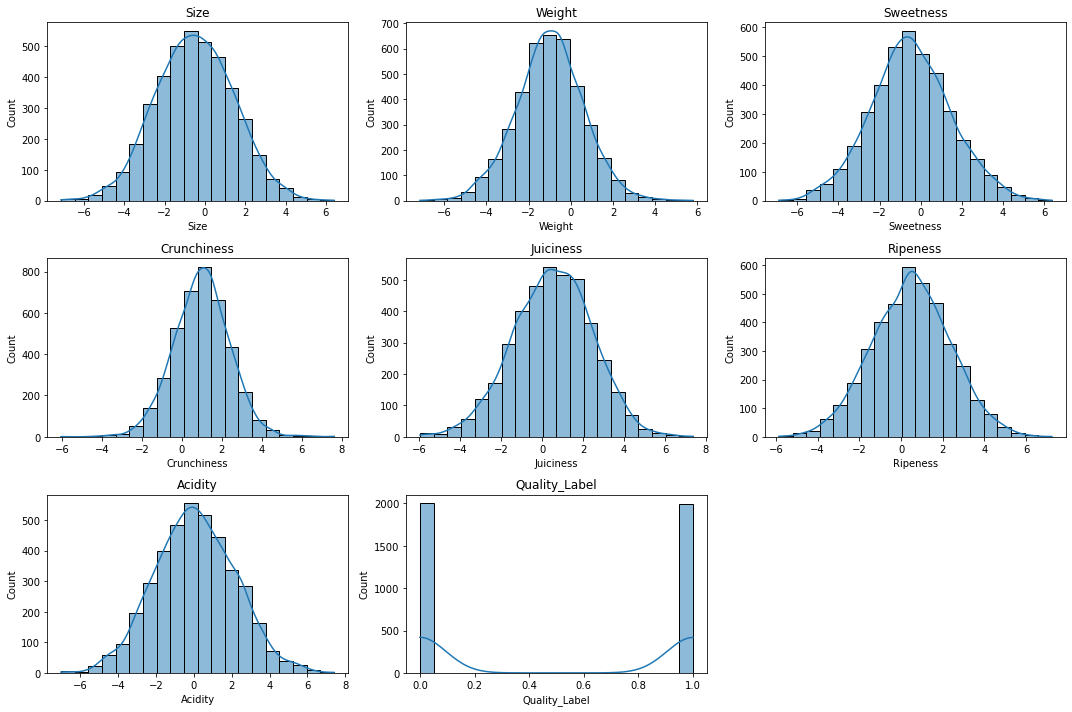

In [9]:
numerical_cols = ['Size', 'Weight', 'Sweetness', 'Crunchiness', 'Juiciness', 'Ripeness', 'Acidity', 'Quality_Label']

plt.figure(figsize=(15, 10))
sns.set_palette("tab10")

for i, column in enumerate(numerical_cols, 1):
    plt.subplot(3, 3, i)
    sns.histplot(data=data, x=column, kde=True, bins=20)  # Use sns.histplot for newer versions
    plt.title(column)

plt.tight_layout()
plt.show()

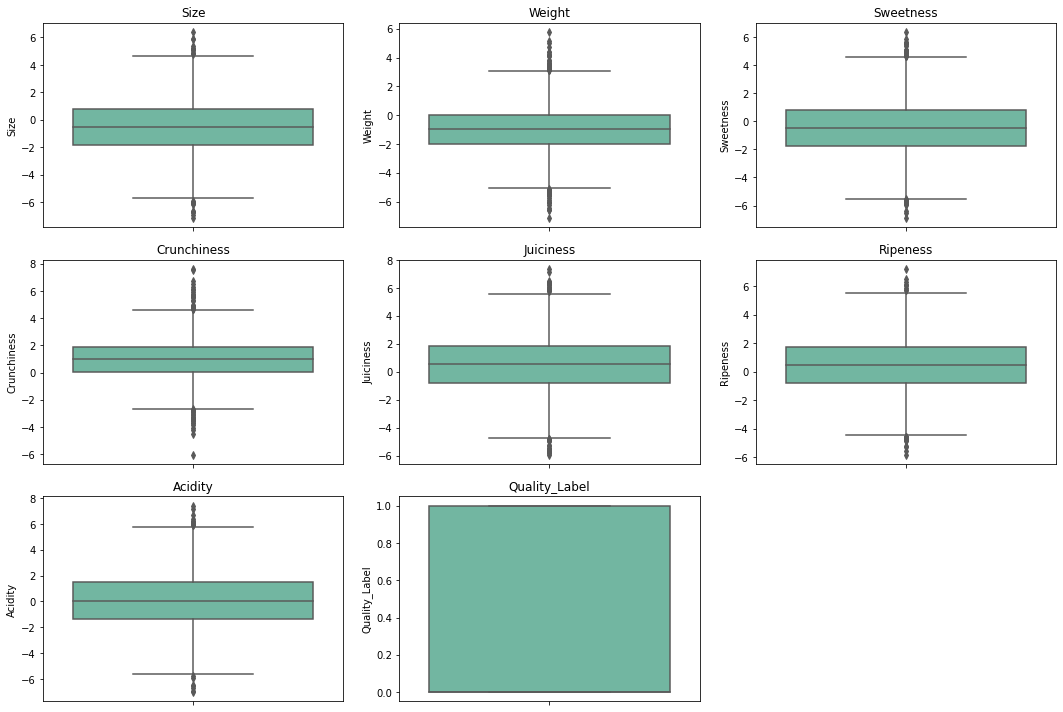

In [10]:
plt.figure(figsize=(15, 10))
sns.set_palette("Set2")
for i, column in enumerate(numerical_cols, 1):
    plt.subplot(3, 3, i)
    sns.boxplot(y=data[column])
    plt.title(column)

plt.tight_layout()
plt.show()

### Bivariate

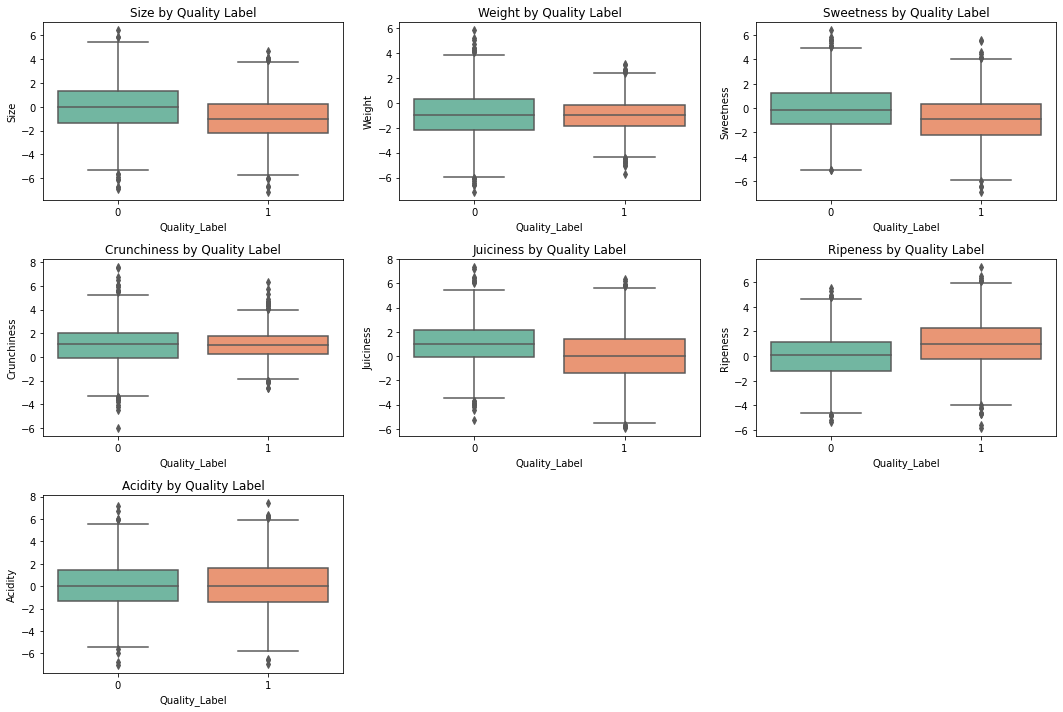

In [11]:
plt.figure(figsize=(15, 10))
sns.set_palette("Set2")

for i, column in enumerate(data.columns[:-1]):  
    plt.subplot(3, 3, i + 1)
    sns.boxplot(x='Quality_Label', y=column, data=data)
    plt.title(f'{column} by Quality Label')

plt.tight_layout()
plt.show()

### Correlation 

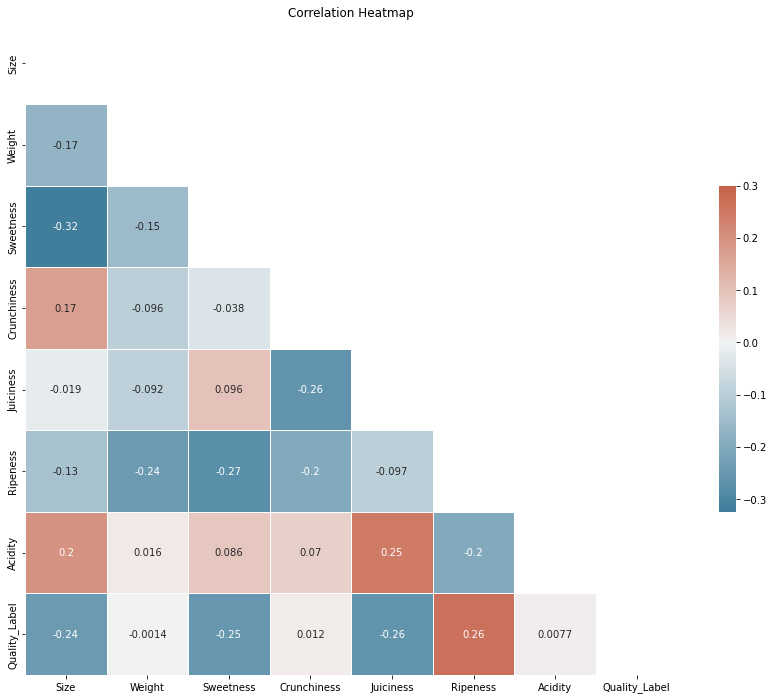

In [12]:
data_corr = data.corr()

mask = np.triu(np.ones_like(data_corr, dtype=bool))

plt.figure(figsize=(15, 12))

cmap = sns.diverging_palette(230, 20, as_cmap=True)

sns.heatmap(data_corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True)

plt.title('Correlation Heatmap')
plt.show()

## Preprocessing

### Outliers

In [13]:
numerical_features = ['Size', 'Weight', 'Sweetness', 'Crunchiness', 'Juiciness', 'Ripeness',
       'Acidity']

robust_scaler = RobustScaler()

data[numerical_features] = robust_scaler.fit_transform(data[numerical_features])

def count_outliers(series):
    Q1 = series.quantile(0.25)
    Q3 = series.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return ((series < lower_bound) | (series > upper_bound)).sum()

for feature in numerical_features :
    num_outliers = count_outliers(data[feature])
    print(f'Number of outliers in {feature}: {num_outliers}')

Number of outliers in Size: 22
Number of outliers in Weight: 54
Number of outliers in Sweetness: 32
Number of outliers in Crunchiness: 47
Number of outliers in Juiciness: 32
Number of outliers in Ripeness: 24
Number of outliers in Acidity: 20


In [14]:
scaler = StandardScaler()

data[numerical_features] = scaler.fit_transform(data[numerical_features])

### Hypothesis Testing

Hypothesis testing is a statistical method used to make decisions based on sample data regarding a proposed claim or hypothesis about a population. In this process, we examine whether the evidence found from the sample is sufficiently strong to support or contradict a statement about a population parameter.

T-statistic: 6.950226687826504e-16
P-value: 0.9999999999999994


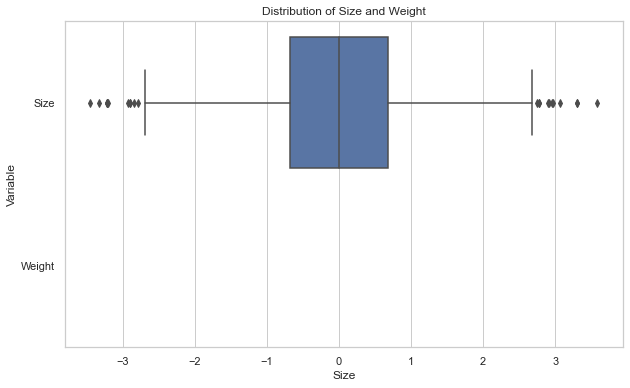

T-statistic: -3.9715581073294313e-16
P-value: 0.9999999999999997


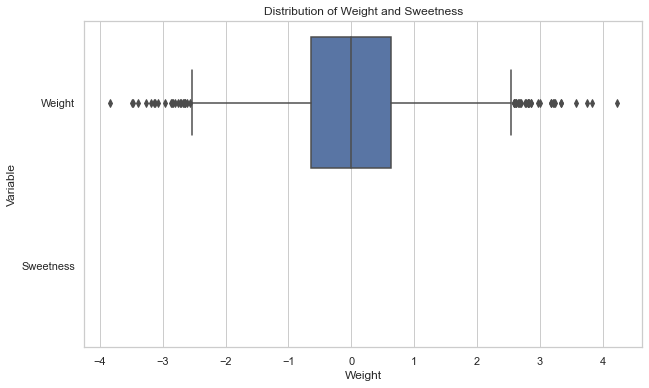

T-statistic: 9.730317362957106e-16
P-value: 0.9999999999999992


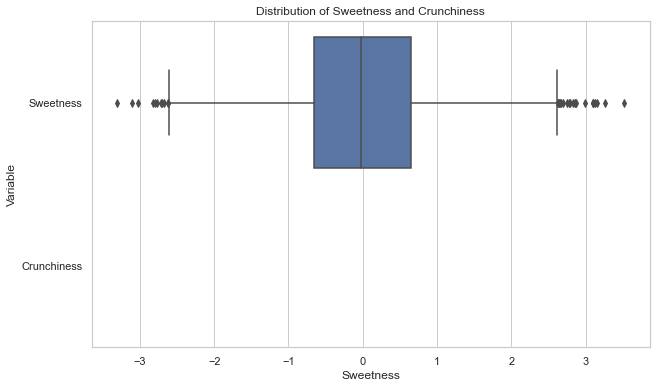

T-statistic: -1.707769986151655e-15
P-value: 0.9999999999999987


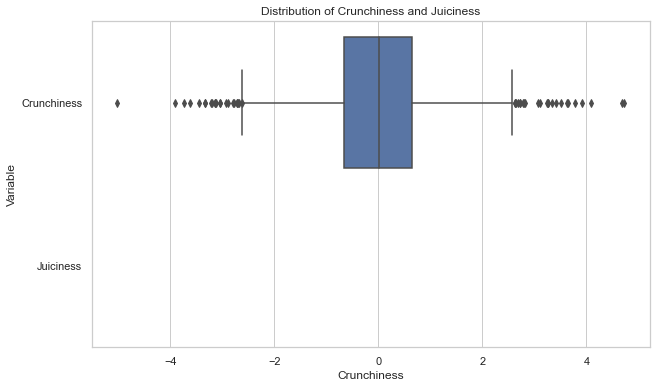

T-statistic: 1.707769986151655e-15
P-value: 0.9999999999999987


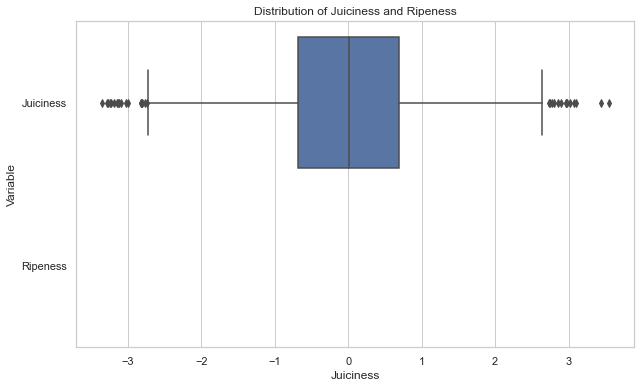

T-statistic: -1.5886232429317723e-16
P-value: 0.9999999999999999


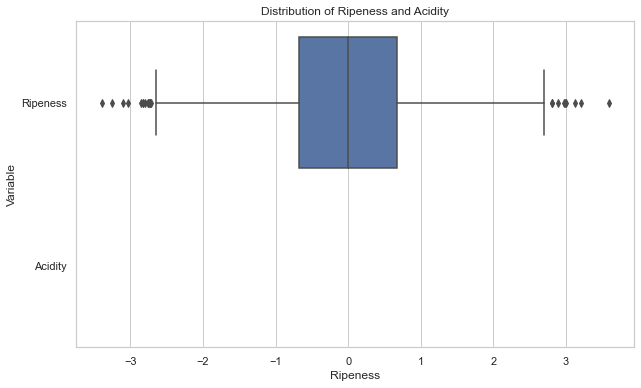

In [15]:
sns.set(style="whitegrid")


def hypothesis_testing(df, column1, column2):
    t_stat, p_val = stats.ttest_ind(df[column1], df[column2])
    
    print("T-statistic:", t_stat)
    print("P-value:", p_val)
    
   
    plt.figure(figsize=(10, 6))
    sns.boxplot(x=df[column1], y="Variable", data=pd.melt(df[[column1, column2]], var_name="Variable"))
    plt.title(f'Distribution of {column1} and {column2}')
    plt.show()

columns_for_testing = ['Size', 'Weight', 'Sweetness', 'Crunchiness', 'Juiciness', 'Ripeness', 'Acidity']

for i in range(len(columns_for_testing) - 1):
    hypothesis_testing(data, columns_for_testing[i], columns_for_testing[i + 1])

**Distribution of Target data (Quality Label)**

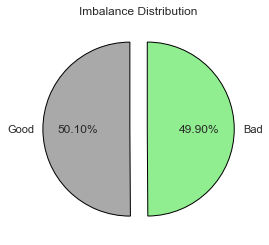

In [16]:
good_count = data['Quality_Label'].eq(0).sum()
bad_count = data['Quality_Label'].eq(1).sum()
total_count = len(data)

good_percentage = (good_count / total_count) * 100
bad_percentage = (bad_count / total_count) * 100

pie_values = [good_percentage, bad_percentage]
colors = ['darkgrey', 'lightgreen']
plt.pie(pie_values, labels=['Good', 'Bad'],
        autopct='%1.2f%%',
        startangle=90,
        explode=(0.1, 0.1),
        colors=colors,
        wedgeprops={'edgecolor': 'black', 'linewidth': 1, 'antialiased': True})
plt.title('Imbalance Distribution')
plt.show()

#### Normalization

In [17]:
df = data.copy()

X = df.drop(['Quality_Label'], axis=1)
y = df['Quality_Label']

In [18]:
scaler = MinMaxScaler(feature_range=(0, 1))
X_scaled = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)

In [19]:
X_scaled.describe()

,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness,Acidity
count,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000
mean,0.490386,0.476046,0.484122,0.514851,0.485807,0.485625,0.491660
std,0.142207,0.123836,0.146460,0.102579,0.144848,0.143059,0.146391
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.393488,0.397052,0.388568,0.447376,0.387250,0.388700,0.390774
50%,0.489598,0.476418,0.481538,0.515785,0.487466,0.486020,0.487895
75%,0.586900,0.554908,0.580012,0.581305,0.585149,0.582396,0.591111
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


###  Split the data

Split the data into train and test data sets.

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

## Modeling

### Logistic Regression

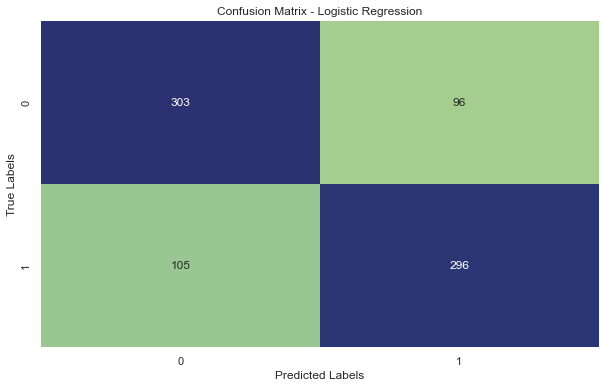


Accuracy of Logistic Regression: 74.875 

Classification Report:
              precision    recall  f1-score   support

           0       0.74      0.76      0.75       399
           1       0.76      0.74      0.75       401

    accuracy                           0.75       800
   macro avg       0.75      0.75      0.75       800
weighted avg       0.75      0.75      0.75       800



In [21]:
lr = LogisticRegression(solver='liblinear').fit(X_train, y_train)
lr_predicted = lr.predict(X_test)

lr_acc_score = accuracy_score(y_test, lr_predicted)
lr_conf_matrix = confusion_matrix(y_test, lr_predicted)

plt.figure(figsize=(10, 6))
sns.heatmap(lr_conf_matrix, annot=True, fmt='d', cmap='crest', cbar=False)
plt.title('Confusion Matrix - Logistic Regression')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

print("\nAccuracy of Logistic Regression:", lr_acc_score * 100, '\n')
print("Classification Report:")
print(classification_report(y_test, lr_predicted))

lr_y_prob = lr.decision_function(X_test)

lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_y_prob)
lr_auc = round(auc(lr_fpr, lr_tpr),2)

### Support Vector Machines

Best Hyperparameters: {'kernel': 'rbf', 'gamma': 'scale', 'C': 100}


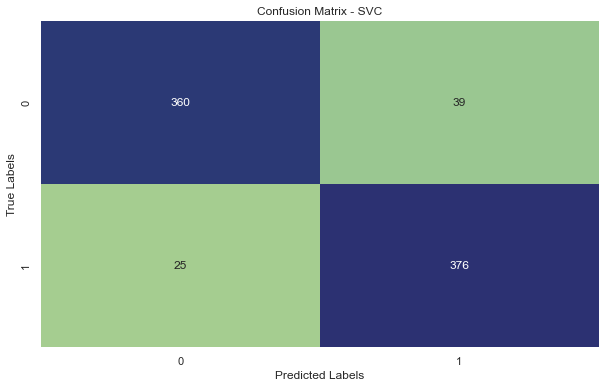


Accuracy of Support Vector Classifier: 92.0 

Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.90      0.92       399
           1       0.91      0.94      0.92       401

    accuracy                           0.92       800
   macro avg       0.92      0.92      0.92       800
weighted avg       0.92      0.92      0.92       800



In [22]:
param_dist = {
    'C': [0.1, 1, 10, 100],
    'kernel': ['linear', 'rbf', 'poly'],
    'gamma': ['scale', 'auto', 0.1, 1],
}

svc = SVC()

randomized_search_svc = RandomizedSearchCV(svc, param_distributions=param_dist, n_iter=10, cv=5, scoring='accuracy', random_state=42, n_jobs=-1)

randomized_search_svc.fit(X_train, y_train)

best_params = randomized_search_svc.best_params_
print(f"Best Hyperparameters: {best_params}")

best_svc_model = randomized_search_svc.best_estimator_
svc_predicted = best_svc_model.predict(X_test)

svc_acc_score = accuracy_score(y_test, svc_predicted)
svc_conf_matrix = confusion_matrix(y_test, svc_predicted)

plt.figure(figsize=(10, 6))
sns.heatmap(svc_conf_matrix, annot=True, fmt='d', cmap='crest', cbar=False)
plt.title('Confusion Matrix - SVC')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

print("\nAccuracy of Support Vector Classifier:", svc_acc_score * 100, '\n')
print("Classification Report:")
print(classification_report(y_test, svc_predicted))

svc_y_prob = best_svc_model.decision_function(X_test)

svc_fpr, svc_tpr, _ = roc_curve(y_test, svc_y_prob)
svc_auc = round(auc(svc_fpr, svc_tpr),2)

### Random Forest Classifier

Best Hyperparameters for Random Forest: {'n_estimators': 200, 'min_samples_split': 5, 'min_samples_leaf': 2, 'max_depth': 20, 'criterion': 'entropy', 'bootstrap': True}


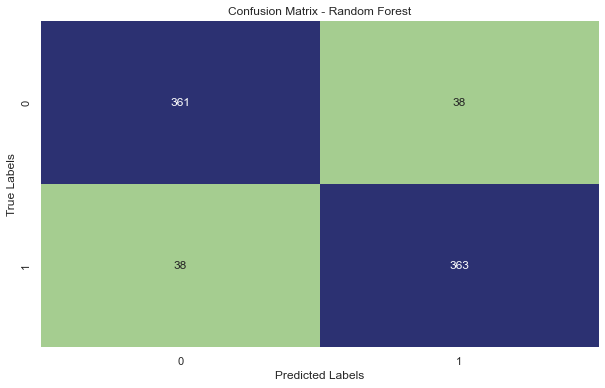


Accuracy of Random Forest Classifier: 90.5 

Classification Report for Random Forest:
              precision    recall  f1-score   support

           0       0.90      0.90      0.90       399
           1       0.91      0.91      0.91       401

    accuracy                           0.91       800
   macro avg       0.90      0.90      0.90       800
weighted avg       0.91      0.91      0.91       800



In [23]:
param_dist_rf = {
    'n_estimators': [50, 100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False],
    'criterion': ['gini', 'entropy'],
}

rf = RandomForestClassifier()

randomized_search_rf = RandomizedSearchCV(
    rf,
    param_distributions=param_dist_rf,
    n_iter=10,
    cv=5,
    scoring='accuracy',
    random_state=42,
    n_jobs=-1
)

randomized_search_rf.fit(X_train, y_train)

best_params_rf = randomized_search_rf.best_params_
print(f"Best Hyperparameters for Random Forest: {best_params_rf}")

best_rf_model = randomized_search_rf.best_estimator_

rf_predicted = best_rf_model.predict(X_test)

rf_acc_score = accuracy_score(y_test, rf_predicted)
rf_conf_matrix = confusion_matrix(y_test, rf_predicted)

plt.figure(figsize=(10, 6))
sns.heatmap(rf_conf_matrix, annot=True, fmt='d', cmap='crest', cbar=False)
plt.title('Confusion Matrix - Random Forest')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

print("\nAccuracy of Random Forest Classifier:", rf_acc_score * 100, '\n')
print("Classification Report for Random Forest:")
print(classification_report(y_test, rf_predicted))

rf_y_prob = best_rf_model.predict_proba(X_test)

rf_fpr, rf_tpr, _ = roc_curve(y_test, rf_y_prob[:,1])
rf_auc = round(auc(rf_fpr, rf_tpr),2)

### XGBoost Classifier

Best Hyperparameters for XGBoost: {'subsample': 0.9, 'reg_lambda': 1.3, 'reg_alpha': 0.1, 'n_estimators': 300, 'min_child_weight': 3, 'max_depth': 10, 'learning_rate': 0.1, 'gamma': 0, 'colsample_bytree': 0.9}


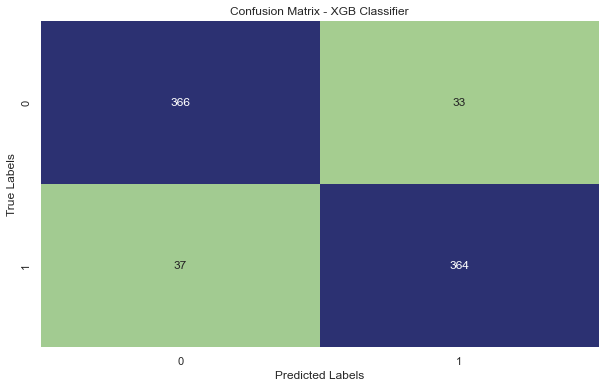


Accuracy of XGBoost Classifier: 91.25 

Classification Report for XGBoost:
              precision    recall  f1-score   support

           0       0.91      0.92      0.91       399
           1       0.92      0.91      0.91       401

    accuracy                           0.91       800
   macro avg       0.91      0.91      0.91       800
weighted avg       0.91      0.91      0.91       800



In [24]:
param_dist_xgb = {
    'learning_rate': [0.01, 0.1, 0.2, 0.3],
    'n_estimators': [50, 100, 200, 300],
    'max_depth': [3, 5, 7, 10],
    'min_child_weight': [1, 3, 5, 7],
    'gamma': [0, 0.1, 0.2, 0.3],
    'subsample': [0.8, 0.9, 1.0],
    'colsample_bytree': [0.8, 0.9, 1.0],
    'reg_alpha': [0, 0.1, 0.2, 0.3],
    'reg_lambda': [1, 1.1, 1.2, 1.3],
}

xgb = XGBClassifier()

randomized_search_xgb = RandomizedSearchCV(
    xgb,
    param_distributions=param_dist_xgb,
    n_iter=10,
    cv=5,
    scoring='accuracy',
    random_state=42,
    n_jobs=-1
)

randomized_search_xgb.fit(X_train, y_train)

best_params_xgb = randomized_search_xgb.best_params_
print(f"Best Hyperparameters for XGBoost: {best_params_xgb}")

best_xgb_model = randomized_search_xgb.best_estimator_

xgb_predicted = best_xgb_model.predict(X_test)

xgb_acc_score = accuracy_score(y_test, xgb_predicted)
xgb_conf_matrix = confusion_matrix(y_test, xgb_predicted)

plt.figure(figsize=(10, 6))
sns.heatmap(xgb_conf_matrix, annot=True, fmt='d', cmap='crest', cbar=False)
plt.title('Confusion Matrix - XGB Classifier')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

print("\nAccuracy of XGBoost Classifier:", xgb_acc_score * 100, '\n')
print("Classification Report for XGBoost:")
print(classification_report(y_test, xgb_predicted))

xgb_y_prob = best_xgb_model.predict_proba(X_test)

xgb_fpr, xgb_tpr, _ = roc_curve(y_test, xgb_y_prob[:,1])
xgb_auc = round(auc(xgb_fpr, xgb_tpr),2)

### K-Nearest Neighbors

Best Hyperparameters for KNeighborsClassifier: {'weights': 'distance', 'p': 2, 'n_neighbors': 10, 'leaf_size': 10, 'algorithm': 'ball_tree'}


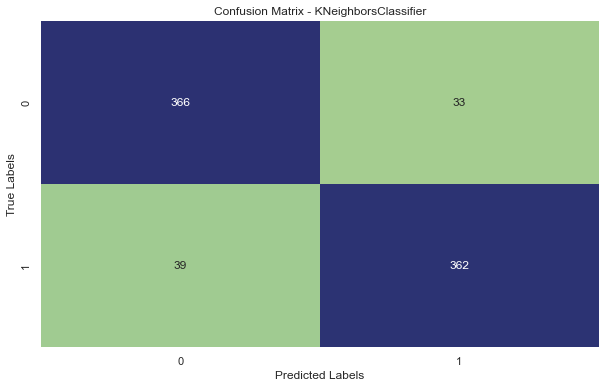


Accuracy of KNeighborsClassifier: 91.0 

Classification Report for KNeighborsClassifier:
              precision    recall  f1-score   support

           0       0.90      0.92      0.91       399
           1       0.92      0.90      0.91       401

    accuracy                           0.91       800
   macro avg       0.91      0.91      0.91       800
weighted avg       0.91      0.91      0.91       800



In [25]:
param_dist_knn = {
    'n_neighbors': [3, 5, 7, 10],
    'weights': ['uniform', 'distance'],
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
    'leaf_size': [10, 20, 30, 40],
    'p': [1, 2],
}

knn = KNeighborsClassifier()

randomized_search_knn = RandomizedSearchCV(
    knn,
    param_distributions=param_dist_knn,
    n_iter=10,
    cv=5,
    scoring='accuracy',
    random_state=42,
    n_jobs=-1
)

randomized_search_knn.fit(X_train, y_train)

best_params_knn = randomized_search_knn.best_params_
print(f"Best Hyperparameters for KNeighborsClassifier: {best_params_knn}")

best_knn_model = randomized_search_knn.best_estimator_

knn_predicted = best_knn_model.predict(X_test)

knn_acc_score = accuracy_score(y_test, knn_predicted)
knn_conf_matrix = confusion_matrix(y_test, knn_predicted)

plt.figure(figsize=(10, 6))
sns.heatmap(knn_conf_matrix, annot=True, fmt='d', cmap='crest', cbar=False)
plt.title('Confusion Matrix - KNeighborsClassifier')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

print("\nAccuracy of KNeighborsClassifier:", knn_acc_score * 100, '\n')
print("Classification Report for KNeighborsClassifier:")
print(classification_report(y_test, knn_predicted))

knn_y_prob = best_knn_model.predict_proba(X_test)

knn_fpr, knn_tpr, _ = roc_curve(y_test, knn_y_prob[:,1])
knn_auc = round(auc(knn_fpr, knn_tpr), 2)

### Receiver Operator Characteristic (ROC)

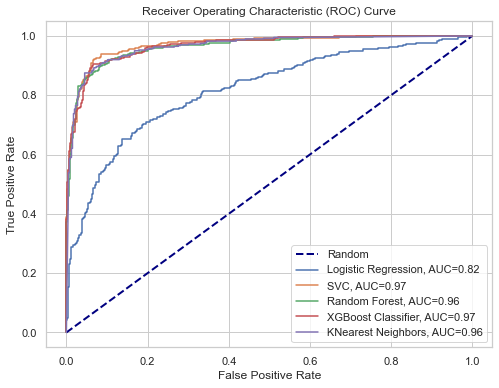

In [26]:
plt.figure(figsize=(8, 6))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Random')
plt.plot(lr_fpr,lr_tpr,label="Logistic Regression, AUC="+str(lr_auc))
plt.plot(svc_fpr,svc_tpr,label="SVC, AUC="+str(svc_auc))
plt.plot(rf_fpr,rf_tpr,label="Random Forest, AUC="+str(rf_auc))
plt.plot(xgb_fpr,xgb_tpr,label="XGBoost Classifier, AUC="+str(xgb_auc))
plt.plot(knn_fpr,knn_tpr,label="KNearest Neighbors, AUC="+str(knn_auc))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

# Results

The classsification report of each classifier shows that I am able to predict consistent classification, AUC for SVC and XGBoost is leaded with 0.97, considering F1 score and Accuracy, the SVC model has best performance to predict the quality of the product.

### Future Work

We could further optimize these models by using GridSearchCV or Boosting algorithms. It took a significant amount of time when training multiple parameters for algorthims through GridSearchCV so we might need to limit the amount of training data.